In [1]:
import matplotlib.pyplot as plt
import numpy as np

Write down 4 ways you can define an array of 21 elements, equally spaced from -5
to 5 (i.e. steps of 0.5)

In [2]:
a = np.arange(-5, 5.1, 0.5)
b = np.linspace(-5, 5, 21)
c = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5,  0, 0.5,  1,  1.5,  2,  2.5,  3,  3.5,  4,  4.5,  5])
d = np.array([])
for i in range(-10, 11):
    d = np.append(d, i/2)

In [3]:
x = a

Using the array you just created, say , compute a new array containing y(x) = x^2 - 5

In [4]:
y = x**2 - 5

Make a line and scatter plot of y(x) on the same axes. Label your axes and give the plot a title.

Text(0.5, 1.0, 'Graph of y against x')

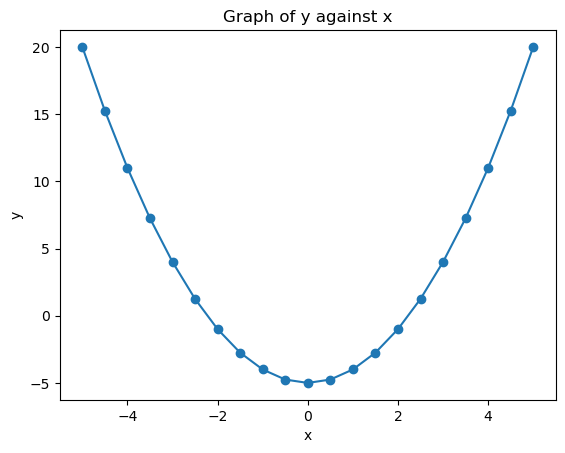

In [5]:
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y against x')

Generate an array of random numbers drawn from a Gaussian distribution

In [6]:
rand_nums = np.random.normal(size=len(x))

Add some noise to the array y created above to create an array of noisy data, say f

In [7]:
f = y + rand_nums

Create a similar plot as before using the noisy data, but this time including error bars representing the noise you applied to the data.

Text(0.5, 1.0, 'Graph of y against x with error bars')

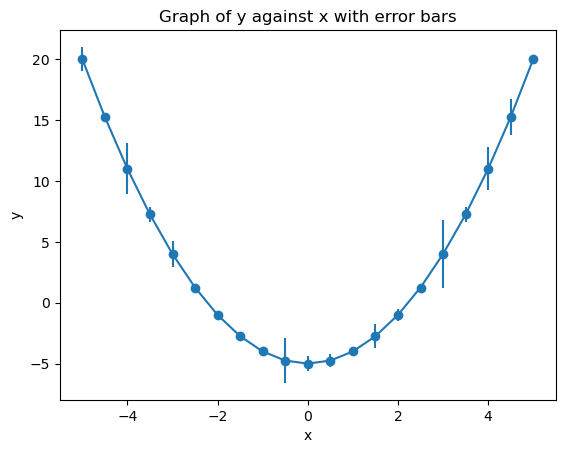

In [8]:
plt.errorbar(x, y, np.abs(rand_nums))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y against x with error bars')

Create a plot of an eccentric planetary orbit, using the equation for an ellipse. Pick a value for the semi-major axis and eccentricity, picking suitable units.

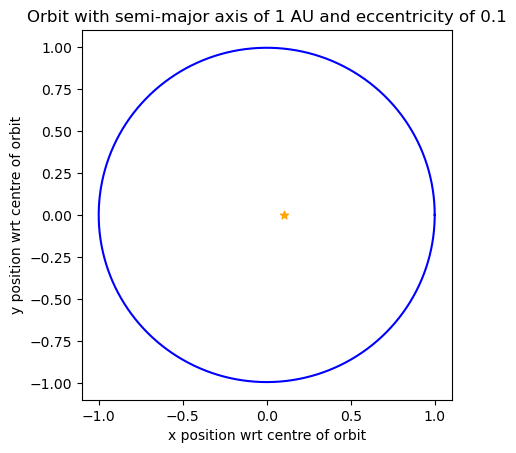

In [43]:
# Semi-major axis and eccentricity
smaj = 1 # AU
ecc = 0.1

# Semi-minor axis calculated from these
smin = smaj*np.sqrt(1-ecc**2)

# r and theta
theta = np.linspace(0, 2*np.pi, 1000)

r = smin / np.sqrt(1 - (ecc*np.cos(theta))**2)

# x and y from this
x = r*np.cos(theta)
y = r*np.sin(theta)


plt.plot(x, y, 'blue')
plt.axis('square')
plt.xlim([-smaj-smaj/10, smaj+smaj/10])
plt.ylim([-smaj-smaj/10, smaj+smaj/10])
plt.xlabel('x position wrt centre of orbit')
plt.ylabel('y position wrt centre of orbit')
plt.title(f'Orbit with semi-major axis of {smaj} AU and eccentricity of {ecc}')

focus = np.sqrt(smaj**2 - smin**2)

plt.scatter(focus, 0, color='orange', marker='*')


Plot the same orbit using polar coordinates and a polar projection.

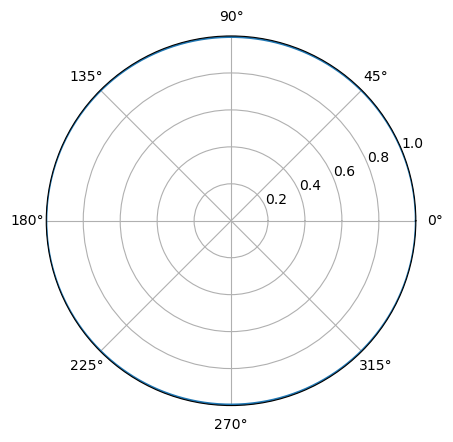

In [44]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)

Add an extra parameter to account for the rotation of the orbit around the argument of periastron $\omega$

Text(0.5, 1.0, 'Orbit with semi-major axis of 1 AU and eccentricity of 0.1')

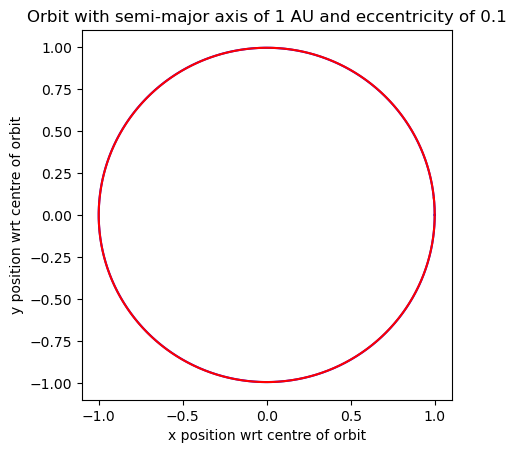

In [45]:
omega = np.arctan(ecc)
theta_rot = theta + omega


# x and y from this
x_rot = r*np.cos(theta_rot)
y_rot = r*np.sin(theta_rot)

plt.plot(x, y, 'blue')

plt.plot(x_rot, y_rot, 'red')
plt.axis('square')
plt.xlim([-smaj-smaj/10, smaj+smaj/10])
plt.ylim([-smaj-smaj/10, smaj+smaj/10])
plt.xlabel('x position wrt centre of orbit')
plt.ylabel('y position wrt centre of orbit')
plt.title(f'Orbit with semi-major axis of {smaj} AU and eccentricity of {ecc}')

Now we want to plot lots of planet orbits. Best to create a simple loop and a function to loop over some data and plot our orbits. Make a function that reads in the semi-major axis, eccentricity, and argument of periastron, and returns and/or plots an orbit. The function call could be something like

In [46]:
def orbit(a, e, w):
    # convert w from degrees to radians
    w = w * np.pi / 180
    
    # theta and r
    theta = np.linspace(0, 2*np.pi, 1000)
    r = a / np.sqrt(1 - (e*np.cos(theta + w))**2)
    
    # x and y of orbit
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    # return only x and y
    return x, y

def orbit_polar(a, e, w):
    # convert w from degrees to radians
    w = w * np.pi / 180
    
    # theta and r
    theta = np.linspace(0, 2*np.pi, 1000)
    r = a / np.sqrt(1 - (e*np.cos(theta + w))**2)
    
    return theta, r

Plot the orbits of the Solar System objects using the data table overleaf. Make the plot square and the axes x/y on the same scale by setting suitable ‘figsize’/limits.

Text(0.5, 1.0, 'Orbits of the planets in the solar system')

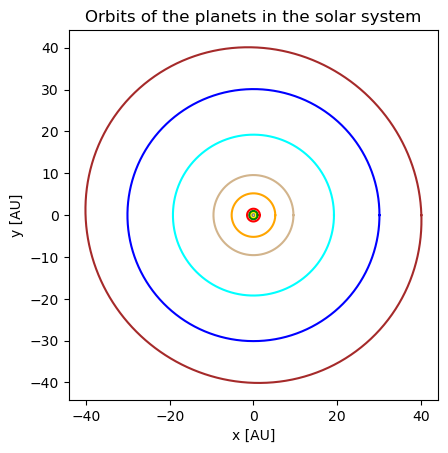

In [47]:
# parameters
a = [0.387, 0.723, 1.000, 1.524, 5.203, 9.555, 19.22, 30.11, 39.48]
e = [0.206, 0.007, 0.017, 0.093, 0.048, 0.056, 0.046, 0.009, 0.249]
w = [77.46, 131.6, 102.9, 336.1, 14.3, 93.1, 173.0, 48.1, 224.133]

colours = ['grey', 'yellow', 'green', 'red', 'orange', 'tan', 'cyan', 'blue', 'brown']

for i in range(len(a)):
    x, y = orbit(a[i],e[i],w[i])
    plt.plot(x, y, color=colours[i])

plt.axis('square')
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Orbits of the planets in the solar system')

Text(0.5, 1.0, 'Orbits of the planets in the solar system plotted in polar coordinates')

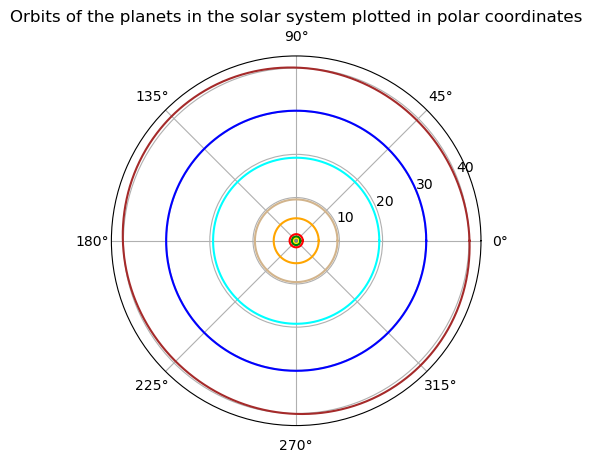

In [48]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

for i in range(len(a)):
    theta, r = orbit_polar(a[i],e[i],w[i])
    ax.plot(theta, r, color=colours[i])

ax.set_rticks([10, 20, 30, 40])
plt.title('Orbits of the planets in the solar system plotted in polar coordinates')

Text(0.5, 0.98, 'The orbits of the planets in the solar system')

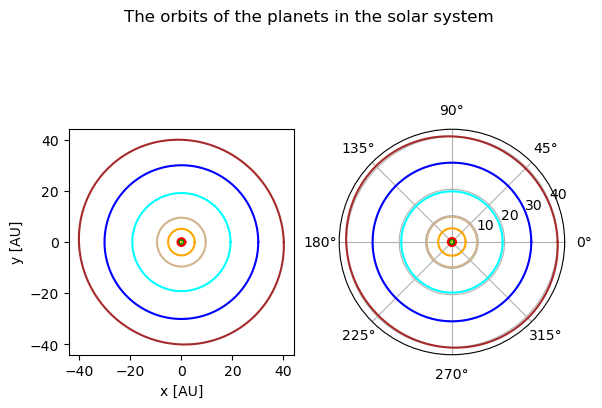

In [49]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='polar')

for i in range(len(a)):
    x, y = orbit(a[i],e[i],w[i])
    ax1.plot(x, y, color=colours[i])
    
for i in range(len(a)):
    theta, r = orbit_polar(a[i],e[i],w[i])
    ax2.plot(theta, r, color=colours[i])

ax1.axis('square')
ax1.set_xlabel('x [AU]')
ax1.set_ylabel('y [AU]')

fig.suptitle('The orbits of the planets in the solar system')